При наличии большого количества входных признаков сложно визуализировать данные. Метод главных компонент позволяет, уменьшив размерность данных анализировать данные и визуально, практически без существенной потери информации. В области машинного обучения есть очень известный термин "Проклятие размерности". В основном, это относится к тому факту, что большее количество признаков в наборе данных отрицательно влияет на точность и время обучения модели машинного обучения. 
Анализ главных компонент (МГК) — это способ решения этой проблемы, который используется для лучшей визуализации данных и повышения точности.
Метод главных компонент – это метод обучения без учителя, которым анализируют выборку на однородность перед применением любого алгоритма обработки данных.


МГК основан на ”ортогональном линейном преобразовании“, которое представляет собой математический метод для проецирования признаков набора данных в новую систему координат. Признак, который описывает наибольшую дисперсию, называется первой главной компонентой и размещается в первой координате. Аналогично, признак, который стоит вторым в описании дисперсии, называется второй основной компонентой и так далее. Полный набор данных может быть выражен в терминах основных компонент. Обычно более 90% различий объясняется двумя / тремя главными компонентами.

Анализ главных компонент, преобразует данные из многомерного пространства в пространство с меньшей размерностью путем выбора наиболее важных признаков, которые содержат максимум информации о наборе данных.

***Задание 1***

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

Набор данных о раке груди является классическим примером для бинарной классификации. Он содержит информацию о различных характеристиках опухолей, что позволяет классифицировать их как доброкачественные или злокачественные.

Набор данных содержит 569 элементов данных с 30 входными признаками. Есть два выходных класса - доброкачественный и злокачественный.

In [58]:
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [59]:
# Check the output classes
print(data['target_names'])
 
# Check the input attributes
print(data['feature_names'])


['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


1.	Стандартизируйте набор данных перед применением МГК.
2.	Импортируйте PCA из sklearn.decomposition.
3.	Выберите количество главных компонент.


In [ ]:
df1=pd.DataFrame(data['data'],columns=data['feature_names'])

scaling=StandardScaler()

scaling.fit(df1)
Scaled_data=scaling.transform(df1)

principal=PCA(n_components=2)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)

print(x.shape)

(569, 2)


4.	Проверка компонент
principal.components_ предоставляет массив, в котором количество строк соответствует количеству главных компонент, а количество столбцов равно количеству объектов в реальных данных. Мы можем легко видеть, что строк три, поскольку n_components было выбрано равным 3. Однако каждая строка содержит 30 столбцов, как и в реальных данных.


In [61]:
principal.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

5.	Построение графика компонент (визуализация) 
Постройте основные компоненты для лучшей визуализации данных. Назначим  n_compents = 2, здесь мы строим 2d-график, используя первые два основных компонента и 2 главных компоненты соответственно.  Цвета показывают 2 выходных класса исходного набора данных - доброкачественный и злокачественный. Ясно, что главные компоненты показывают четкое разделение между двумя выходными классами.


x[:,0] - обозначает первую главную компоненту. Аналогично, x[:,1] и x[:,2] представляют вторую и третью главные компоненты.

Text(0, 0.5, 'pc2')

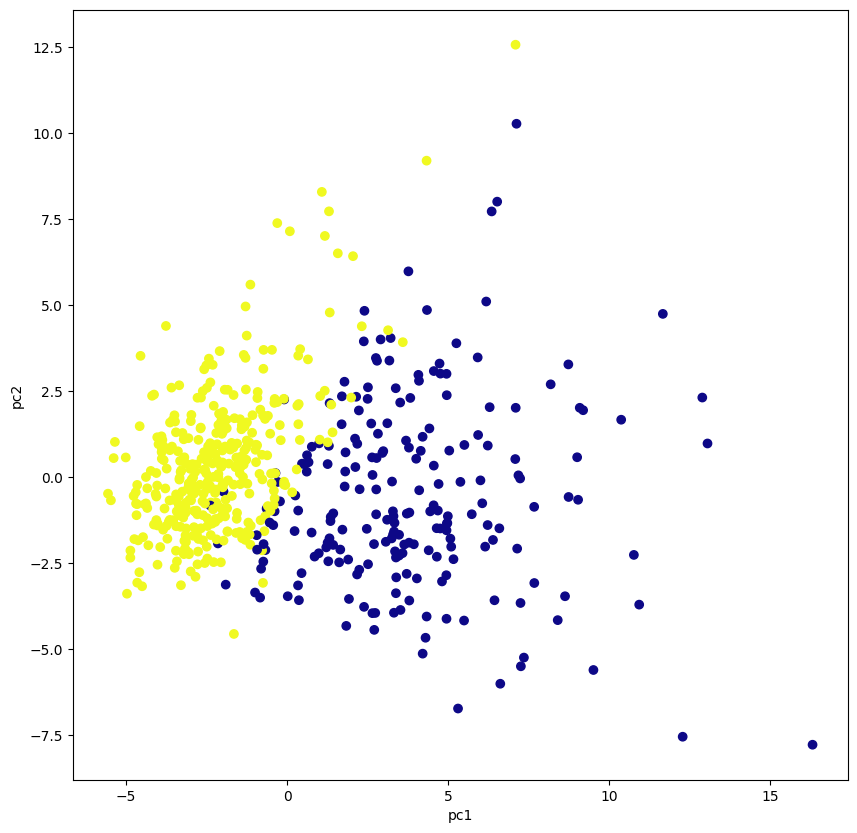

In [62]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=data['target'],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')


6.	Вычислите коэффициент дисперсии
Explained_variance_ratio дает представление о том, насколько большие вариации объясняются главными компонентами.


In [63]:
print(principal.explained_variance_ratio_)
summ = principal.explained_variance_ratio_
summ.sum()

[0.44272026 0.18971182]


np.float64(0.6324320765155945)

***Задание 2***

Объясненная дисперсия: Значения, которые вы получите в principal.explained_variance_ratio_, будут представлять собой долю дисперсии, объясняемую каждой из двух главных компонент. 

Я получила значения [0.44272026 0.18971182], это означает, что первая главная компонента объясняет 44% дисперсии, а вторая — 19%.
Потеря дисперсии: Чтобы определить, какую долю дисперсии я потеряла, можно сложить значения объясненной дисперсии для двух компонент и вычесть из 1. 

Объясненная дисперсия: 44.27% для первой компоненты и 18.97% для второй.

Потеря дисперсии: 100% - (44.27% + 18.97%) = 36.76%.

***Задание 3***

Модифицируйте код таким образом, чтобы визуализировать данные в осях первых 3-х компонент.
После модификации:
Определите какое значение объясненной дисперсии Вы получите для данных распределив их в осях первых 3-х главных компонент? На сколько выросла величина объясненной дисперсии данных?


In [64]:
df1=pd.DataFrame(data['data'],columns=data['feature_names'])

scaling=StandardScaler()

scaling.fit(df1)
Scaled_data=scaling.transform(df1)

principal=PCA(n_components=3)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)

print(x.shape)

(569, 3)


In [65]:
principal.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947],
       [-0.00853124,  0.0645499 , -0.00931422,  0.02869953, -0.1042919 ,
        -0.07409157,  0.00273384, -0.02556354, -0

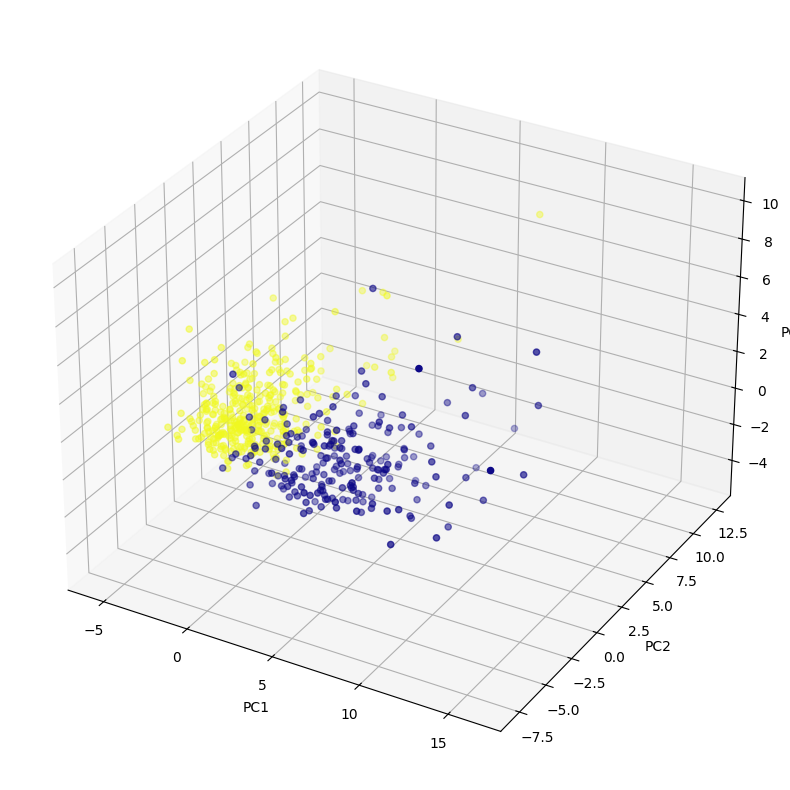

In [66]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=data['target'], cmap='plasma')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [67]:
print(principal.explained_variance_ratio_)
summ = principal.explained_variance_ratio_
summ.sum()

[0.44272026 0.18971182 0.09393163]


np.float64(0.7263637090899084)

In [1]:
print(1 - 0.44272026 - 0.18971182- 0.09393163)

0.27363629000000006


Определите какое значение объясненной дисперсии Вы получите для данных распределив их в осях первых 3-х главных компонент? == 0.7263637090899084

На сколько выросла величина объясненной дисперсии данных? 0.7263637090899084 - 0.6324320765155945 = 0.09393163257431392

3 компонента вносит незначительный вклад

1)	Рассчитайте кумулятивную объясненную дисперсию и постройте ее график. 
2)	Рассчитайте минимальное количество основных компонентов, необходимое для сохранения 95% дисперсии данных.

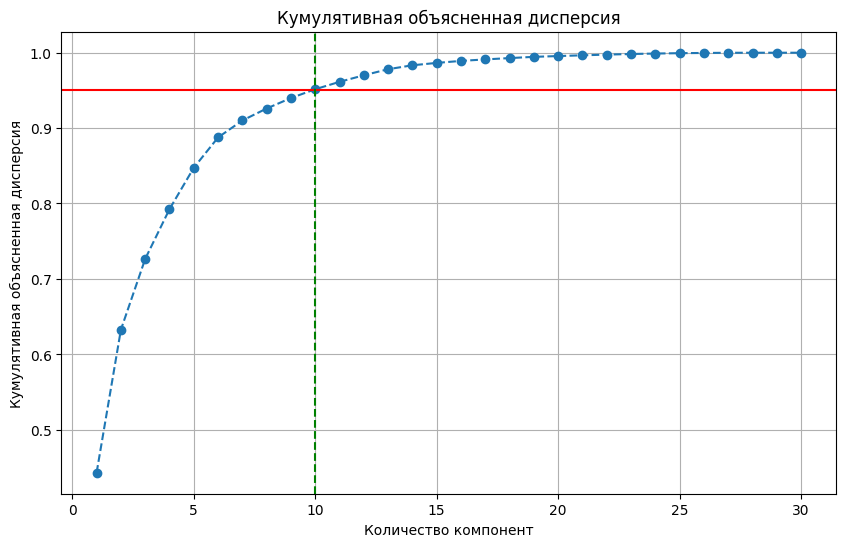

In [68]:
principal = PCA(n_components=len(data['feature_names']))
principal.fit(Scaled_data)

# Расчет кумулятивной объясненной дисперсии
cumulative_variance = np.cumsum(principal.explained_variance_ratio_)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Кумулятивная объясненная дисперсия')
plt.xlabel('Количество компонент')
plt.ylabel('Кумулятивная объясненная дисперсия')
plt.grid()
plt.axhline(y=0.95, color='r', linestyle='-')
plt.axvline(x=np.argmax(cumulative_variance >= 0.95) + 1, color='g', linestyle='--')
plt.show()

Глядя на график объясненной дисперсии как функции количества основных компонентов, мы наблюдаем изгиб кривой. Оптимальное количество основных компонентов достигается, когда кумулятивная объясненная дисперсия перестает быстро расти:

Минимальное количество основных компонентов, необходимое для сохранения 95% дисперсии данных, можно вычислить с помощью следующей команды:

In [69]:
d = np.argmax(cumulative_variance >= 0.95) + 1
print(d)

10
